In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

import gc
from tqdm import tqdm

# Goal
This data challenge involves classification task. The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

The challenge is to correctly predict if a customer will click 'buy' on a website.

In [2]:
train = pd.read_csv('../input/classification-data-challenge/train.csv')
test = pd.read_csv('../input/classification-data-challenge/test.csv')

sub = pd.read_csv('../input/classification-data-challenge/submission.csv')

print(train.shape)
print(test.shape)


(4107, 87)
(1715, 86)


In [3]:
train

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,1,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,6,23,1,2,1,5,0,5,0,5,0,6,3,3,5,2,0,5,4,2,0,0,4,2,2,2,2,2,4,2,9,0,5,3,3,9,0,5,2,3,0,0,3,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,5816,13,1,2,3,3,0,2,0,7,5,2,3,3,3,5,2,4,4,2,0,0,2,2,4,2,2,1,4,2,9,0,6,0,3,7,2,3,4,3,0,0,4,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4103,5818,36,1,1,2,8,0,6,1,2,1,2,6,5,3,2,2,5,2,2,0,0,4,1,3,2,3,3,3,0,9,0,5,1,3,5,4,4,3,3,0,0,3,3,2,0,0,6,0,4,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0
4104,5819,35,1,4,4,8,1,4,1,4,6,0,3,2,2,5,0,0,9,2,1,1,3,3,2,0,4,5,0,0,3,6,6,1,2,6,3,0,9,0,0,0,4,5,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4105,5820,33,1,3,4,8,0,6,0,3,5,1,4,3,3,4,0,1,8,1,0,0,2,3,5,1,1,1,4,4,7,2,4,0,5,8,1,5,3,1,1,0,3,3,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [4]:
def eda(df):
    summary = pd.DataFrame()
    summary['dtype'] = df.dtypes
    summary['miss'] = df.isnull().sum()
    summary['nlevel'] = df.nunique()
    return summary

eda(train).T

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
dtype,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
miss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nlevel,4107,40,7,5,6,10,10,10,6,10,10,8,10,10,10,10,10,10,10,10,6,10,10,10,10,10,10,10,10,9,10,10,10,8,10,10,10,10,10,10,9,7,10,8,4,7,4,5,4,6,3,5,5,5,5,10,6,3,5,9,3,6,2,5,5,3,3,2,7,5,4,4,4,5,4,3,6,2,2,3,7,2,3,3,3,3,2


In [5]:
eda(test).T

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
dtype,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
miss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nlevel,1715,38,6,5,6,10,9,10,6,10,10,7,10,10,10,10,10,10,10,10,6,9,10,10,10,10,10,8,10,8,10,10,10,7,10,10,10,10,10,10,9,6,10,8,3,6,4,5,4,5,3,5,5,5,6,7,5,3,2,8,1,5,2,7,4,2,2,2,4,4,3,2,4,4,4,3,5,2,2,3,5,1,3,4,2,2


# Target

In [6]:
train['Buy'].value_counts()/len(train)

0    0.939615
1    0.060385
Name: Buy, dtype: float64

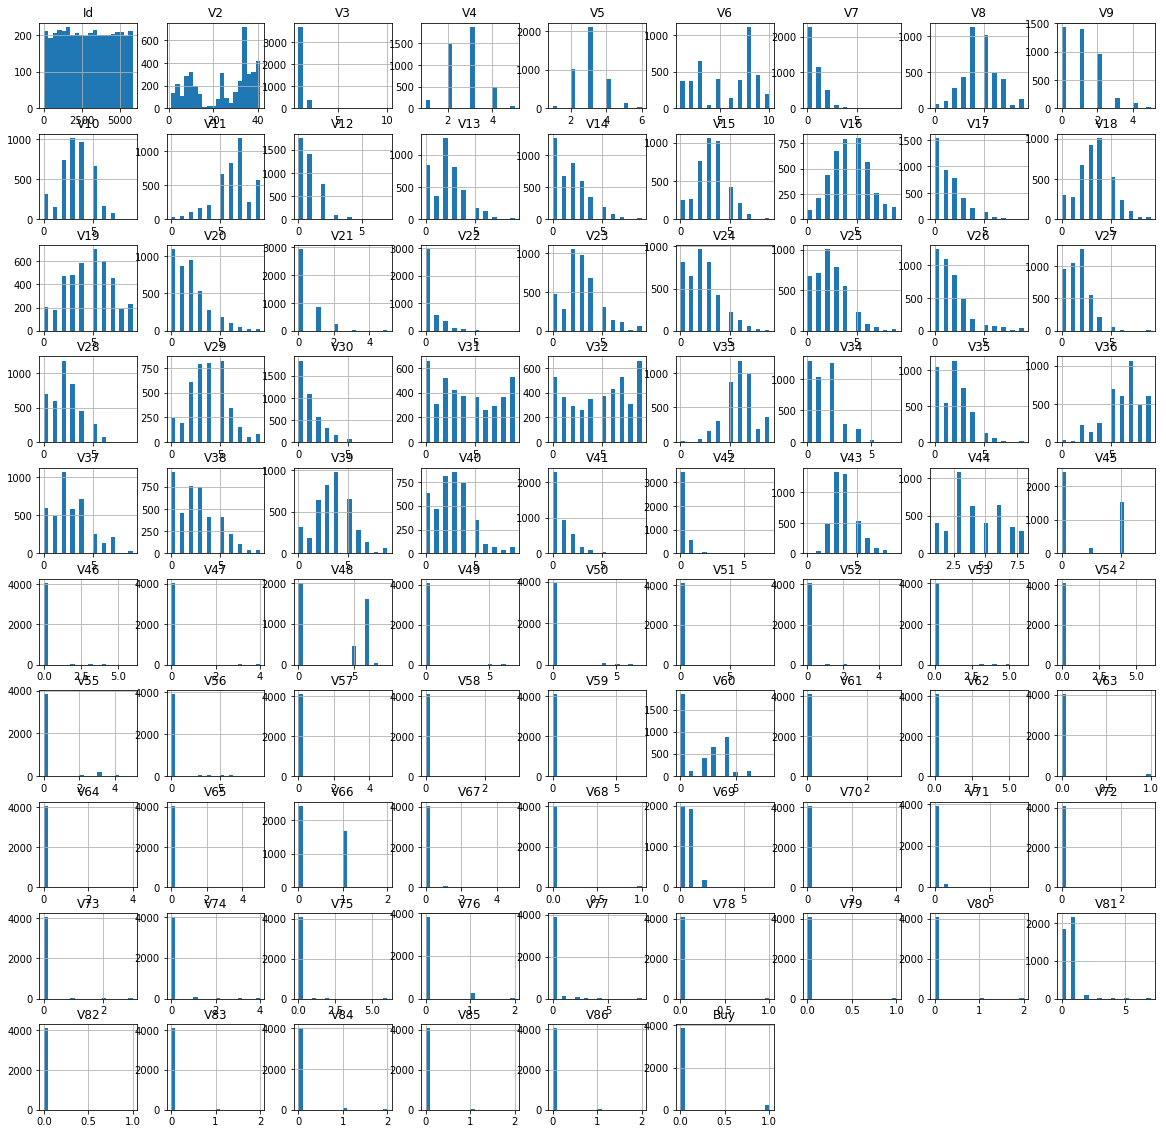

In [7]:
train.hist(figsize = (20,20), bins = 20)
plt.show()

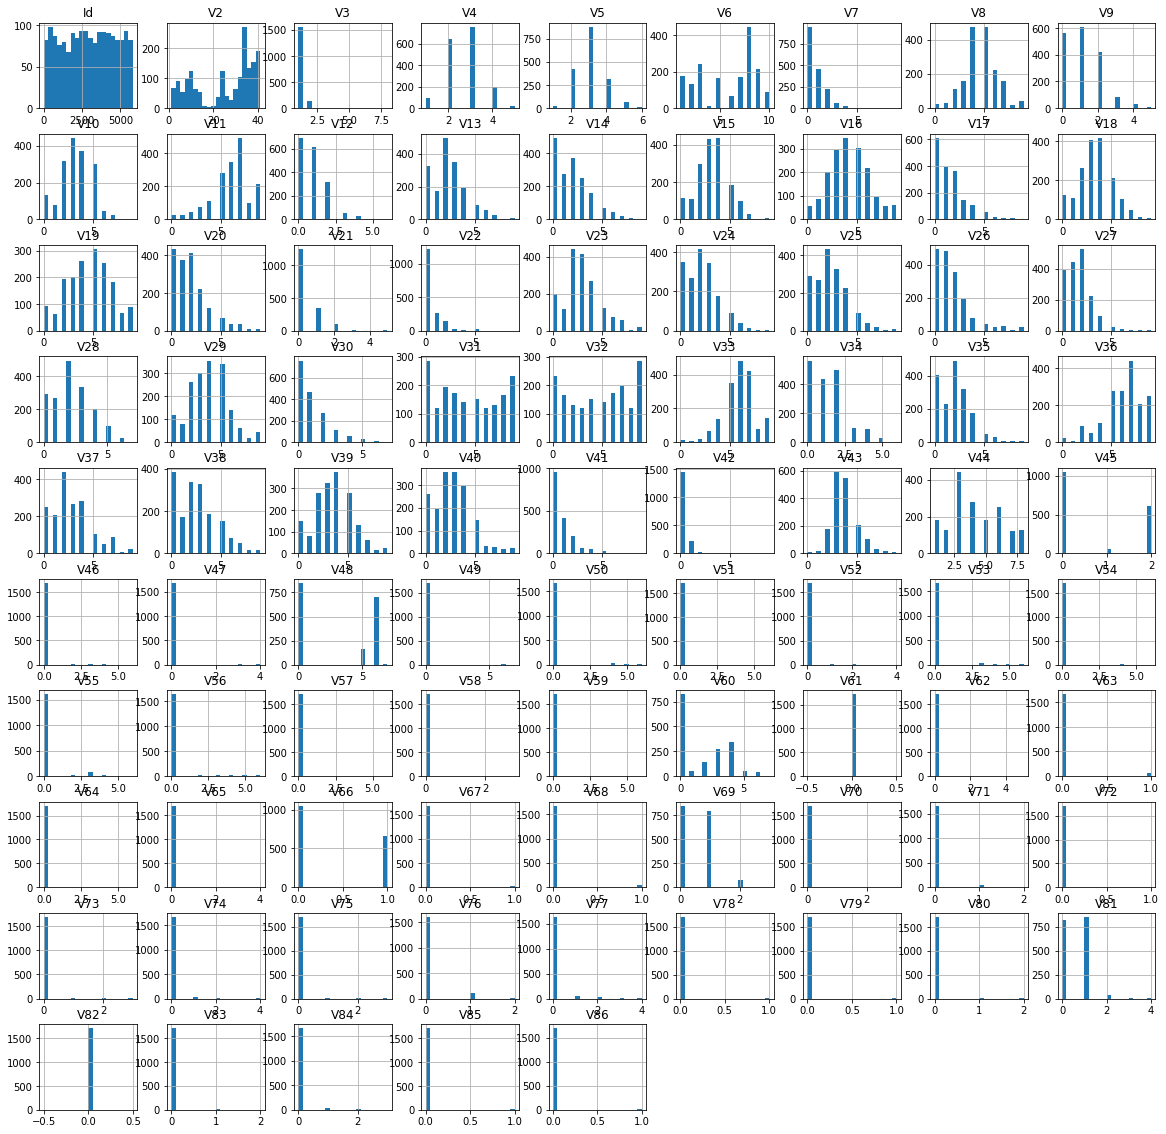

In [8]:
test.hist(figsize = (20,20), bins = 20)
plt.show()

In [9]:
train.V48.value_counts()

0    1998
6    1621
5     453
7      32
8       3
Name: V48, dtype: int64

In [10]:
test.V48.value_counts()

0    847
6    698
5    160
7      9
4      1
Name: V48, dtype: int64

# Correlation Analysis

In [11]:
train.corr()['Buy'].abs().sort_values(ascending = False)[:30]

Buy    1.000000
V83    0.156455
V48    0.153422
V69    0.141662
V62    0.137874
V44    0.100881
V43    0.100674
V17    0.094038
V19    0.093743
V45    0.091047
V60    0.086303
V38    0.082602
V66    0.081347
V31    0.078772
V86    0.078570
V32    0.077900
V2     0.077316
V35    0.076628
V6     0.075875
V41    0.071340
V65    0.069814
V26    0.069003
V36    0.068036
V33    0.067783
V11    0.067428
V37    0.067109
V20    0.065525
V40    0.063148
V25    0.059413
V30    0.059166
Name: Buy, dtype: float64

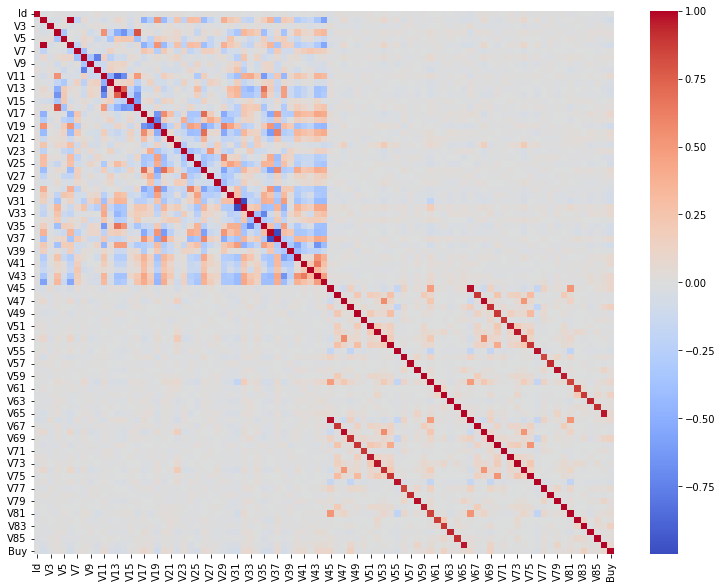

In [12]:
plt.figure(figsize = (13,10))
sns.heatmap(train.corr(), cmap = 'coolwarm')
plt.show()

# Columns with high correlation

In [13]:
thr = 0.95
corr_matrix = train.drop(['Id','Buy'], axis = 1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

to_drop = [c for c in upper.columns if any(upper[c] > thr)]
to_drop

['V6', 'V32', 'V37', 'V66', 'V68', 'V72', 'V73', 'V76', 'V79', 'V80', 'V86']

In [14]:
fea = [f for f in train.columns if 'V' in f and (f not in to_drop)]
print(len(fea))

74


# Target v.s. Features

64it [00:00, 84.34it/s]


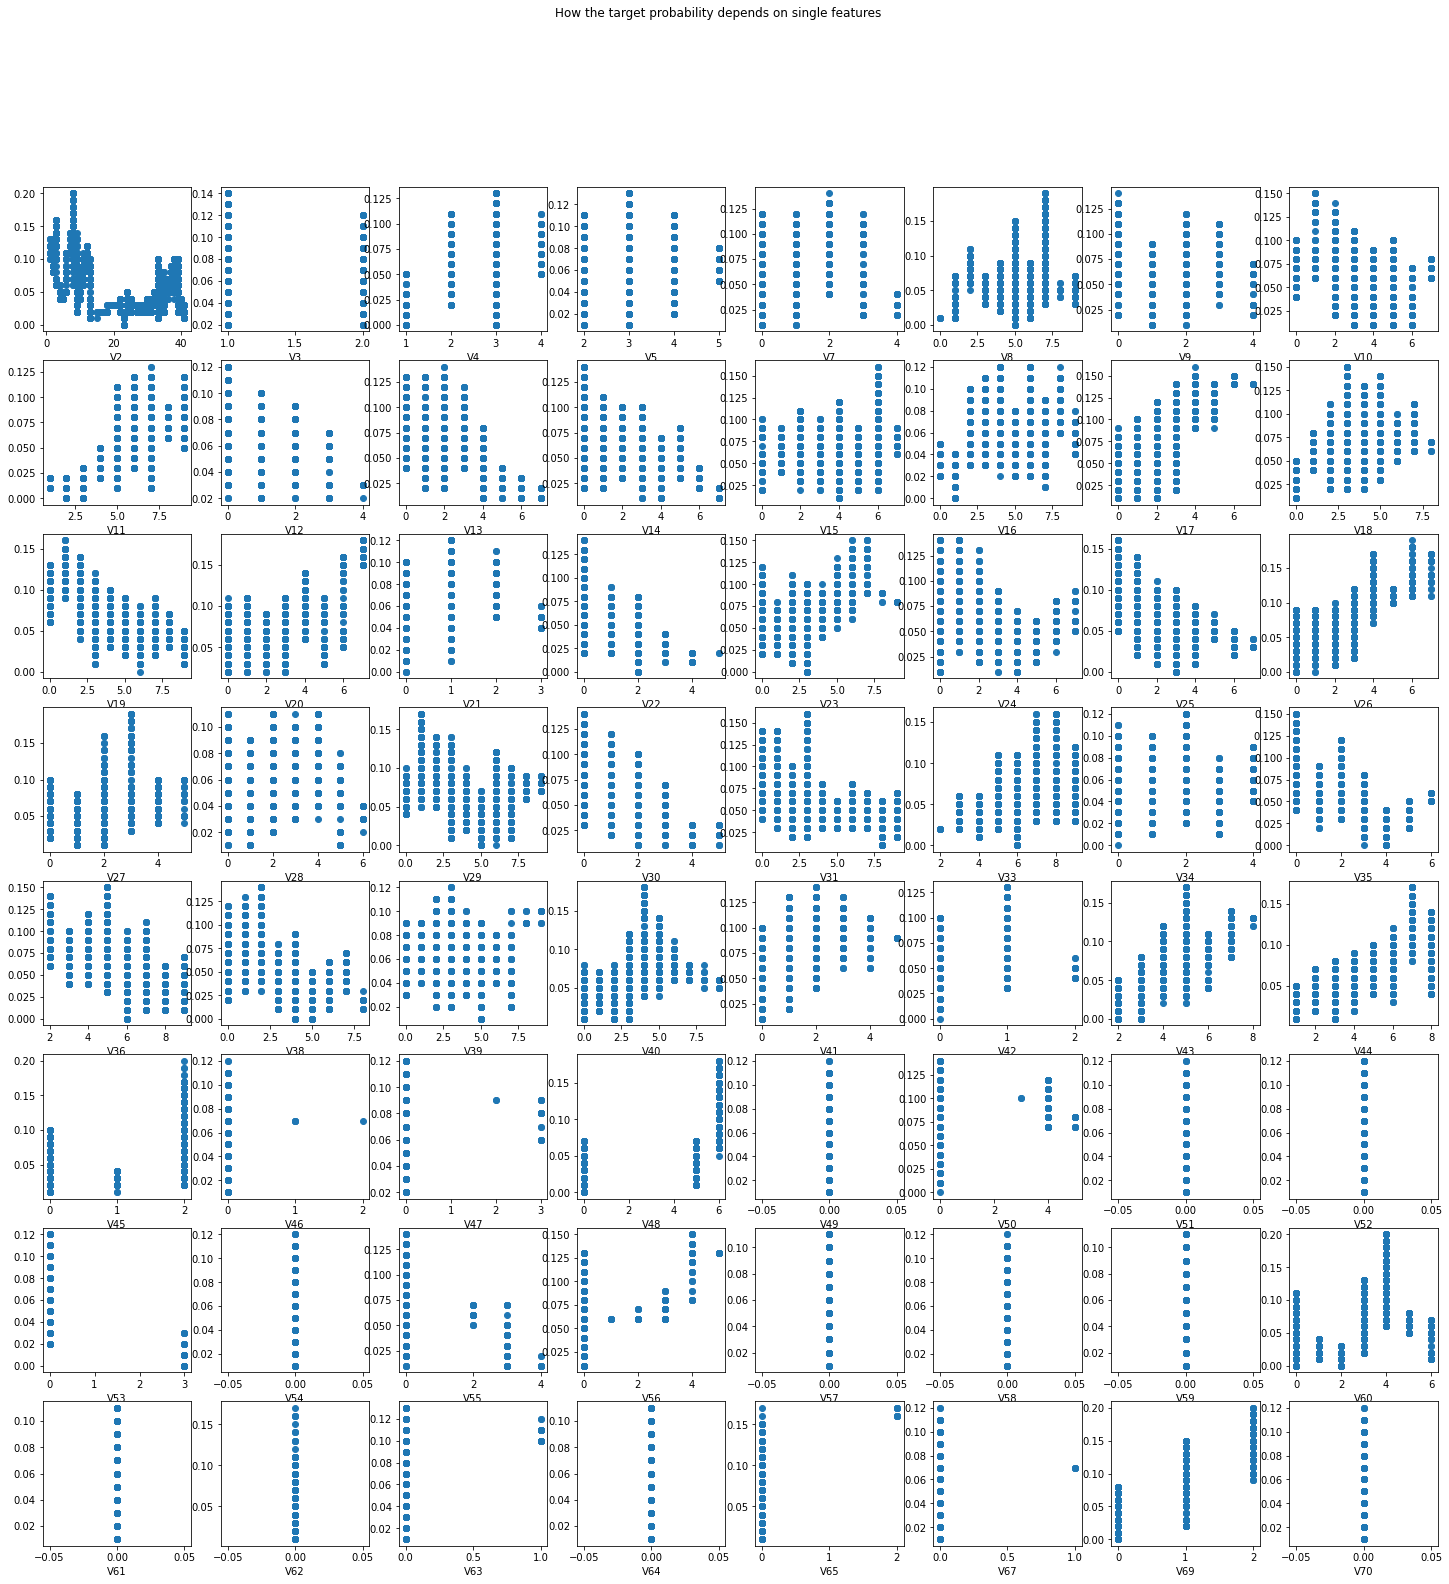

CPU times: user 6.65 s, sys: 262 ms, total: 6.91 s
Wall time: 6.69 s


In [15]:
%%time

fig, axe = plt.subplots(8,8, figsize = (25,25))
for f, ax in tqdm(zip(fea, axe.ravel())):
    tmp = train[[f, 'Buy']].sort_values(by = f)
    ax.scatter(tmp[f], tmp.Buy.rolling(100, center = True).mean())
    ax.set_xlabel(f'{f}')
plt.suptitle('How the target probability depends on single features')
plt.show()    

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df = pd.concat([train, test])

for c in fea:
    df[c] = le.fit_transform(df[c])
    

# FE

In [17]:
######################### Freq encoding

for col in fea:    
    fq_encode = df[col].value_counts(dropna= True, normalize = True).to_dict()   
    df[col+'_fq_enc'] = df[col].map(fq_encode)
    
df.head()    

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy,V2_fq_enc,V3_fq_enc,V4_fq_enc,V5_fq_enc,V7_fq_enc,V8_fq_enc,V9_fq_enc,V10_fq_enc,V11_fq_enc,V12_fq_enc,V13_fq_enc,V14_fq_enc,V15_fq_enc,V16_fq_enc,V17_fq_enc,V18_fq_enc,V19_fq_enc,V20_fq_enc,V21_fq_enc,V22_fq_enc,V23_fq_enc,V24_fq_enc,V25_fq_enc,V26_fq_enc,V27_fq_enc,V28_fq_enc,V29_fq_enc,V30_fq_enc,V31_fq_enc,V33_fq_enc,V34_fq_enc,V35_fq_enc,V36_fq_enc,V38_fq_enc,V39_fq_enc,V40_fq_enc,V41_fq_enc,V42_fq_enc,V43_fq_enc,V44_fq_enc,V45_fq_enc,V46_fq_enc,V47_fq_enc,V48_fq_enc,V49_fq_enc,V50_fq_enc,V51_fq_enc,V52_fq_enc,V53_fq_enc,V54_fq_enc,V55_fq_enc,V56_fq_enc,V57_fq_enc,V58_fq_enc,V59_fq_enc,V60_fq_enc,V61_fq_enc,V62_fq_enc,V63_fq_enc,V64_fq_enc,V65_fq_enc,V67_fq_enc,V69_fq_enc,V70_fq_enc,V71_fq_enc,V74_fq_enc,V75_fq_enc,V77_fq_enc,V78_fq_enc,V81_fq_enc,V82_fq_enc,V83_fq_enc,V84_fq_enc,V85_fq_enc
0,1,31,0,2,1,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.139127,0.904672,0.454483,0.249399,0.554449,0.257815,0.345929,0.249571,0.289076,0.420474,0.301615,0.163346,0.182068,0.134490,0.227070,0.160941,0.109928,0.213844,0.71642,0.146685,0.256098,0.053246,0.247166,0.269495,0.254208,0.287874,0.083648,0.268464,0.073514,0.044830,0.318447,0.133288,0.120062,0.223978,0.232910,0.085538,0.557540,0.841635,0.318447,0.261766,0.598076,0.985915,0.979389,0.398317,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.025593,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.465819,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271
1,2,35,0,1,1,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.022673,0.904672,0.366025,0.249399,0.274648,0.276022,0.345929,0.229131,0.201305,0.184644,0.301615,0.301786,0.249914,0.189969,0.368774,0.126761,0.146170,0.261766,0.71642,0.717279,0.074030,0.200447,0.132600,0.298523,0.306252,0.201821,0.200618,0.447784,0.123154,0.242700,0.252147,0.279114,0.150292,0.187908,0.079869,0.085538,0.126417,0.841635,0.125902,0.154930,0.365510,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.091893,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271
2,3,35,0,1,1,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.022673,0.904672,0.366025,0.249399,0.554449,0.276022,0.238406,0.229131,0.042254,0.184644,0.111302,0.089145,0.249914,0.109069,0.368774,0.126761,0.146170,0.261766,0.71642,0.717279,0.030574,0.200447,0.247166,0.298523,0.013397,0.170045,0.199072,0.447784,0.072999,0.242700,0.318447,0.279114,0.146341,0.102886,0.159911,0.153040,0.557540,0.841635,0.331845,0.154930,0.365510,0.985915,0.979389,0.398317,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.091893,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.465819,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271
3,4,8,0,2,2,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.047750,0.904672,0.454483,0.515287,0.125902,0.101340,0.238406,0.229131,0.162487,0.184644,0.301615,0.214188,0.257300,0.195294,0.093954,0.244933

In [18]:

train = df[:len(train)]
test = df[-len(test):]

X_train = train.drop(['Id','Buy'], axis = 1)
y_train = train.Buy

X_test = test.drop(['Id', 'Buy'], axis = 1)
print(X_train.shape)
print(X_test.shape)

(4107, 159)
(1715, 159)


# Modeling

In [19]:
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, train_test_split

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,test_size = 0.2, shuffle = True, random_state = 22)
print(X_tr.shape)
print(X_val.shape)
print(y_tr.shape)
print(y_val.shape)

(3285, 159)
(822, 159)
(3285,)
(822,)


# Logistic Regression with 'balanced'

In [20]:
lr = LogisticRegression( class_weight = 'balanced', random_state = 222)
lr.fit(X_tr, y_tr)
y_test = lr.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_test)
print(auc)

0.7714236529523154


In [21]:
print('accuracy score: \n', accuracy_score(y_val, lr.predict(X_val)), '\n')

print('auc score: \n', roc_auc_score(y_val, lr.predict_proba(X_val)[:,1]), '\n')

print('classification report \n', classification_report(y_val, lr.predict(X_val)), '\n')

print('confusion matrix \n', confusion_matrix(y_val, lr.predict(X_val)), '\n')

accuracy score: 
 0.7153284671532847 

auc score: 
 0.7714236529523154 

classification report 
               precision    recall  f1-score   support

         0.0       0.98      0.71      0.83       785
         1.0       0.11      0.73      0.19        37

    accuracy                           0.72       822
   macro avg       0.55      0.72      0.51       822
weighted avg       0.94      0.72      0.80       822
 

confusion matrix 
 [[561 224]
 [ 10  27]] 



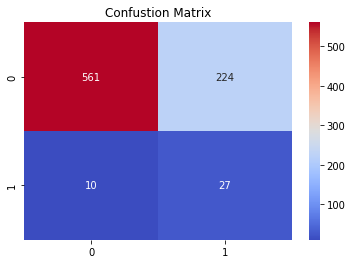

In [22]:
sns.heatmap(confusion_matrix(y_val, lr.predict(X_val)), annot = True, cmap = 'coolwarm', fmt='g')
plt.title('Confustion Matrix')
plt.show()

# LGBM with 'balanced'

In [23]:
clf = lgb.LGBMClassifier(
learning_rate = 0.0005,
    n_estimators = 1000,
    subsample = 0.8,
    colsample_bytree = 0.5,
    reg_alpha = 0.5,
    reg_lambda = 0.5,
    importance_type= 'gain',
    class_weight = 'balanced',

)

clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr),(X_val, y_val)], early_stopping_rounds= 200,
       verbose=50, eval_metric= 'auc')


[50]	training's auc: 0.933106	training's binary_logloss: 0.683878	valid_1's auc: 0.813118	valid_1's binary_logloss: 0.684688
[100]	training's auc: 0.9353	training's binary_logloss: 0.674911	valid_1's auc: 0.8089	valid_1's binary_logloss: 0.676569
[150]	training's auc: 0.93741	training's binary_logloss: 0.66625	valid_1's auc: 0.810122	valid_1's binary_logloss: 0.668786
[200]	training's auc: 0.938631	training's binary_logloss: 0.657915	valid_1's auc: 0.812567	valid_1's binary_logloss: 0.661259


LGBMClassifier(class_weight='balanced', colsample_bytree=0.5,
               importance_type='gain', learning_rate=0.0005, n_estimators=1000,
               reg_alpha=0.5, reg_lambda=0.5, subsample=0.8)

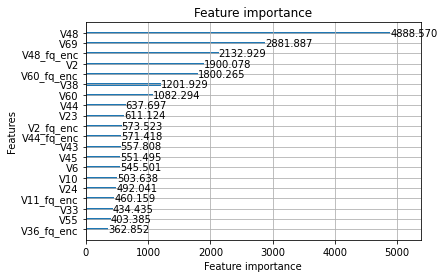

In [24]:
lgb.plot_importance(clf, max_num_features=20)

plt.show()

In [25]:
print('accuracy score: \n', accuracy_score(y_val, clf.predict(X_val)), '\n')

print('auc score: \n', roc_auc_score(y_val, clf.predict_proba(X_val)[:,1]), '\n')

print('classification report \n', classification_report(y_val, clf.predict(X_val)), '\n')

print('confusion matrix \n', confusion_matrix(y_val, clf.predict(X_val)), '\n')

accuracy score: 
 0.7749391727493917 

auc score: 
 0.8197452229299363 

classification report 
               precision    recall  f1-score   support

         0.0       0.98      0.78      0.87       785
         1.0       0.12      0.65      0.21        37

    accuracy                           0.77       822
   macro avg       0.55      0.71      0.54       822
weighted avg       0.94      0.77      0.84       822
 

confusion matrix 
 [[613 172]
 [ 13  24]] 



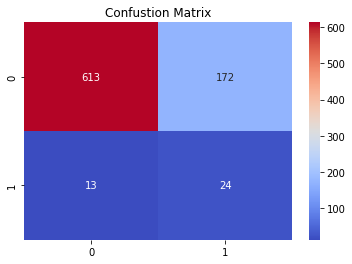

In [26]:
sns.heatmap(confusion_matrix(y_val, clf.predict(X_val)), annot = True, cmap = 'coolwarm', fmt='g')
plt.title('Confustion Matrix')
plt.show()

# LGBM with SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_tr, y_tr)

print('Before', Counter(y_train))
print('After', Counter(y_train_smt))

X_train_smt.head()

Before Counter({0.0: 3859, 1.0: 248})
After Counter({0.0: 3074, 1.0: 3074})


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V2_fq_enc,V3_fq_enc,V4_fq_enc,V5_fq_enc,V7_fq_enc,V8_fq_enc,V9_fq_enc,V10_fq_enc,V11_fq_enc,V12_fq_enc,V13_fq_enc,V14_fq_enc,V15_fq_enc,V16_fq_enc,V17_fq_enc,V18_fq_enc,V19_fq_enc,V20_fq_enc,V21_fq_enc,V22_fq_enc,V23_fq_enc,V24_fq_enc,V25_fq_enc,V26_fq_enc,V27_fq_enc,V28_fq_enc,V29_fq_enc,V30_fq_enc,V31_fq_enc,V33_fq_enc,V34_fq_enc,V35_fq_enc,V36_fq_enc,V38_fq_enc,V39_fq_enc,V40_fq_enc,V41_fq_enc,V42_fq_enc,V43_fq_enc,V44_fq_enc,V45_fq_enc,V46_fq_enc,V47_fq_enc,V48_fq_enc,V49_fq_enc,V50_fq_enc,V51_fq_enc,V52_fq_enc,V53_fq_enc,V54_fq_enc,V55_fq_enc,V56_fq_enc,V57_fq_enc,V58_fq_enc,V59_fq_enc,V60_fq_enc,V61_fq_enc,V62_fq_enc,V63_fq_enc,V64_fq_enc,V65_fq_enc,V67_fq_enc,V69_fq_enc,V70_fq_enc,V71_fq_enc,V74_fq_enc,V75_fq_enc,V77_fq_enc,V78_fq_enc,V81_fq_enc,V82_fq_enc,V83_fq_enc,V84_fq_enc,V85_fq_enc
0,36,0,2,2,9,0,5,1,3,7,1,2,3,2,5,1,3,6,2,1,1,2,3,3,1,1,1,5,2,5,4,5,2,2,7,2,4,4,1,1,1,3,3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.058227,0.904672,0.454483,0.515287,0.554449,0.257815,0.345929,0.249571,0.289076,0.348677,0.301615,0.145654,0.182068,0.189969,0.227070,0.228444,0.147029,0.234284,0.206458,0.146685,0.256098,0.200447,0.190484,0.269495,0.254208,0.147887,0.200618,0.146341,0.089145,0.207832,0.300240,0.279114,0.259533,0.102886,0.232910,0.112848,0.233425,0.131055,0.331845,0.154930,0.365510,0.985915,0.979389,0.398317,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.931982,0.949674,0.994675,0.993473,0.996049,0.210581,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.465819,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.518207,0.999485,0.994332,0.974751,0.992271
1,9,0,2,2,3,1,4,1,4,9,0,0,0,5,4,3,5,2,5,0,0,1,1,3,2,2,5,2,0,0,9,7,2,0,2,7,0,2,5,3,1,6,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.028341,0.904672,0.454483,0.515287,0.274648,0.276022,0.345929,0.229131,0.136379,0.420474,0.201477,0.301786,0.104088,0.195294,0.093954,0.126761,0.114565,0.042769,0.716420,0.717279,0.069220,0.158193,0.190484,0.205771,0.306252,0.061319,0.149433,0.447784,0.163002,0.242700,0.300240,0.249055,0.052731,0.223978,0.157850,0.085538,0.042254,0.131055,0.060976,0.073171,0.598076,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.005840,0.949674,0.994675,0.993473,0.996049,0.457918,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.457918,0.999485,0.994332,0.974751,0.992271
2,7,0,3,2,2,0,7,0,2,9,0,0,0,4,5,2,5,3,0,2,0,6,0,2,2,3,3,3,0,4,5,9,0,0,3,6,0,3,3,3,0,6,6,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.058227,0.904672,0.119031,0.515287,0.554449,0.096874,0.344040,0.181209,0.136379,0.420474,0.201477,0.301786,0.249914,0.189969,0.196496,0.126761,0.116798,0.261766,0.059773,0.717279,0.036242,0.200447,0.247166,0.205771,0.133116,0.201821,0.187221,0.447784,0.088801,0.086740,0.318447,0.249055,0.030402,0.223978,0.197011,0.208691,0.042254,0.841635,0.060976,0.081415,0.598076,0.985915,0.979389,0.488664,0.991755,0.961869,0.998454,0.988835,0.975438,0.996393,0.048437,0.949674,0.994675,0.993473,0.996049,0.457918,0.999485,0.994332,0.974751,0.992271,0.985915,0.985915,0.488664,0.991755,0.961869,0.975438,0.996393,0.949674,0.994675,0.457918,0.999485,0.994332,0.974751,0.992271
3,23,0,1,3,6,1,2,1,7,1,1,7,5,4,1,3,3,3,1,0,0,4,3,3,1,2,4,2,2,8,1,2,0,7,7,2,6,3,1,1,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.014085,0.904672,0.366025,0.184301,0.274648,0.068018,0.345929,0.017348,0.012882,0.348677,0.010993,0.044486,0.249914,0.050155,0.093954,0.228444,0.116798,0.213844,0.716420,0

In [28]:
clfs = lgb.LGBMClassifier(
learning_rate = 0.0005,
    n_estimators = 1000,
    
    subsample = 0.8,
    colsample_bytree = 0.5,
    reg_alpha = 0.8,
    reg_lambda = 0.5,
    importance_type= 'gain',


)

clfs.fit(X_train_smt, y_train_smt, eval_set = [(X_train_smt, y_train_smt),(X_val, y_val)], early_stopping_rounds= 100,
       verbose=50, eval_metric= 'auc')

[50]	training's auc: 0.988536	training's binary_logloss: 0.676751	valid_1's auc: 0.819194	valid_1's binary_logloss: 0.678285
[100]	training's auc: 0.988463	training's binary_logloss: 0.660936	valid_1's auc: 0.824806	valid_1's binary_logloss: 0.663907
[150]	training's auc: 0.988542	training's binary_logloss: 0.645825	valid_1's auc: 0.821949	valid_1's binary_logloss: 0.650319
[200]	training's auc: 0.988797	training's binary_logloss: 0.630982	valid_1's auc: 0.823636	valid_1's binary_logloss: 0.636874


LGBMClassifier(colsample_bytree=0.5, importance_type='gain',
               learning_rate=0.0005, n_estimators=1000, reg_alpha=0.8,
               reg_lambda=0.5, subsample=0.8)

In [29]:
print('accuracy score: \n', accuracy_score(y_val, clfs.predict(X_val)), '\n')

print('auc score: \n', roc_auc_score(y_val, clfs.predict_proba(X_val)[:,1]), '\n')

print('classification report \n', classification_report(y_val, clfs.predict(X_val)), '\n')

print('confusion matrix \n', confusion_matrix(y_val, clfs.predict(X_val)), '\n')

accuracy score: 
 0.9294403892944039 

auc score: 
 0.8260457910139438 

classification report 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       785
         1.0       0.18      0.16      0.17        37

    accuracy                           0.93       822
   macro avg       0.57      0.56      0.57       822
weighted avg       0.93      0.93      0.93       822
 

confusion matrix 
 [[758  27]
 [ 31   6]] 



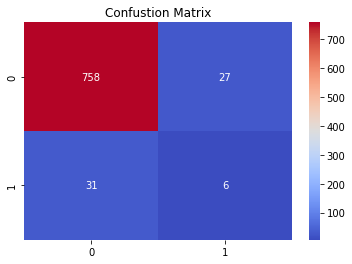

In [30]:
sns.heatmap(confusion_matrix(y_val, clfs.predict(X_val)), annot = True, cmap = 'coolwarm', fmt='g')
plt.title('Confustion Matrix')
plt.show()

# Submission

In [31]:
pred = (lr.predict_proba(X_test)[:,1] + clf.predict_proba(X_test)[:,1])/2
#+  clfs.predict_proba(X_test)[:,1])/3

#pred = [1 if x>=0.5 else 0 for x in pred]

sub.Predicted = pred
sub

,Id,Predicted
0,5,0.343473
1,14,0.355130
2,16,0.349737
3,26,0.433681
4,28,0.274335
...,...,...
1710,5801,0.334767
1711,5803,0.286861
1712,5808,0.478211
1713,5817,0.594542


In [32]:
sub.Predicted.describe()

count    1715.000000
mean        0.429706
std         0.127929
min         0.247268
25%         0.318788
50%         0.403372
75%         0.533282
max         0.751335
Name: Predicted, dtype: float64

In [33]:
sub.Predicted.value_counts()

0.316884    3
0.441802    3
0.386415    3
0.536002    3
0.377563    3
           ..
0.428151    1
0.359860    1
0.555553    1
0.363539    1
0.594542    1
Name: Predicted, Length: 1643, dtype: int64

In [34]:
sub.to_csv('sub.csv', index = False)